In [1]:
# Libraries to be imported
import sys
import sklearn
import matplotlib
import numpy
import pandas

# Checking System version,for reviewing doubts if they occur sometime later
print("Python {}".format(sys.version))
print("Numpy {}".format(numpy.__version__))
print("Pandas {}".format(pandas.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Sklearn {}".format(sklearn.__version__))


Python 3.7.0 (default, Jun 28 2018, 13:15:42) 
[GCC 7.2.0]
Numpy 1.15.1
Pandas 0.23.4
Matplotlib 2.2.3
Sklearn 0.19.2


In [54]:
import numpy as np
from sklearn import preprocessing,model_selection
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
#Loading the dataset, learning how to get data from the UCI repositories by using their URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# The csv files doesnt have column headers included, thus we look at the repositiry information section and define headers ourselves
names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','signle_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [47]:
df.head(-10)

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,signle_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


In [16]:
#Just doing to be able to see as many datavalues as wanted
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [46]:
#Preprocessing the data

df.replace('?',np.nan,inplace=True)
print(df.axes)
# Id column doesnt tell us anything important
df.drop(['id'],axis=1,inplace=True)
# Printing the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [33]:
# Doing some data Visualizations

print(df.loc[0])# First cell in the dataset, Class vlaue has 2 has benign(NON-cancerous), 4 is malignant(Cancerous)
print(df.describe()) # To look for any anomaly in data # mean of class column is near 2 therefore. slightly beningn data


clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
signle_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000              699.

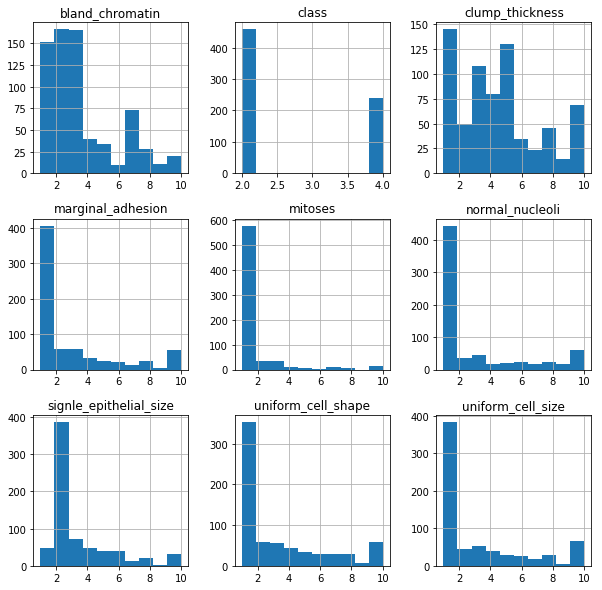

In [34]:
# Visualization, plotting histograms for each variable
df.hist(figsize=(10,10))
plt.show()

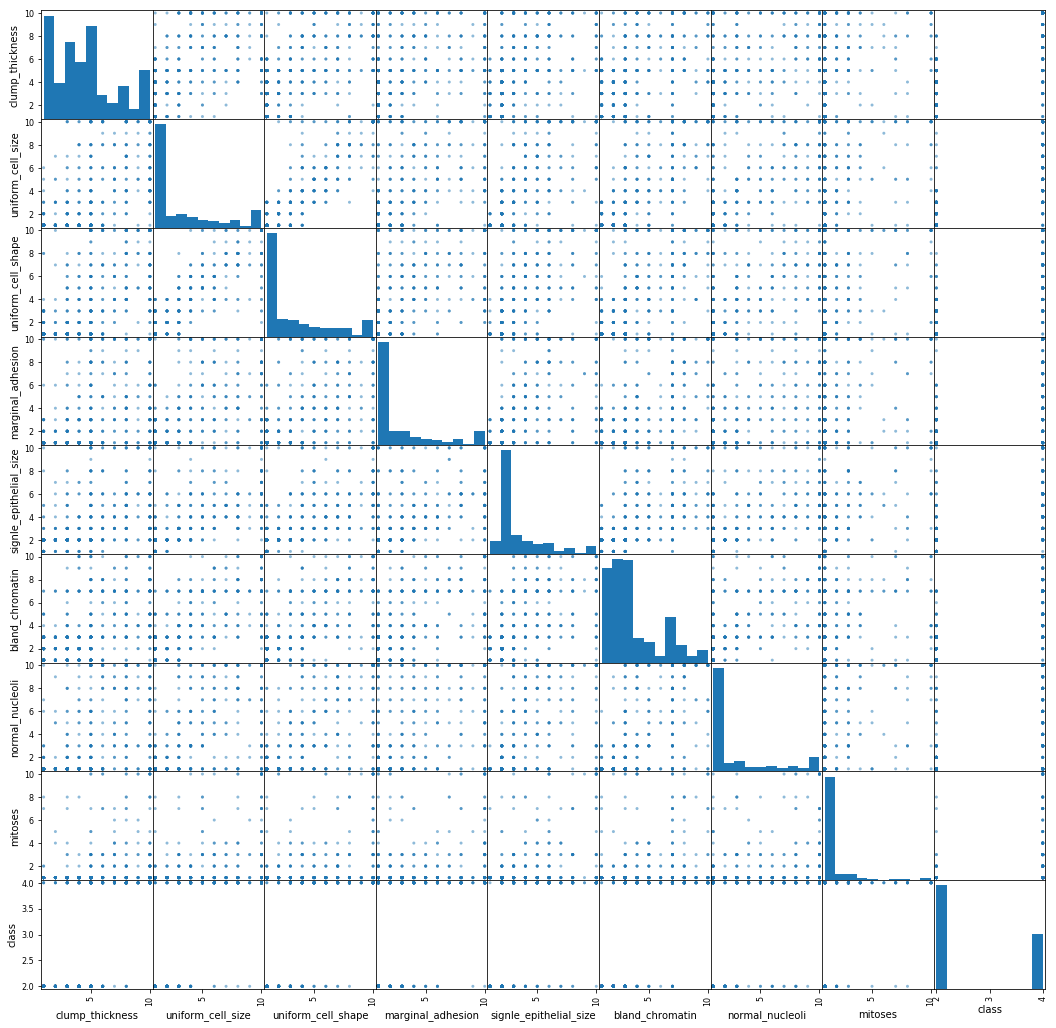

In [35]:
# create a scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [36]:
#Splitting the data into X and Y datasets for training and test
X=np.array(df.drop(['class'],1))
y=np.array(df['class'])

X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.2)

In [49]:
# Specifying testing options, using a seed which makes it reproducible, and constant
seed=8
scoring='accuracy'

In [60]:
# Define the models to train the data on
models=[]
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
#print(models) : to see the list that has been created by us
# Evaluate each model  in turn
results=[]
names=[]

#Loop to work with both the models together

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="{} : {} ({})".format(name,cv_results.mean(),cv_results.std())
    print(msg)
    
### If we resplit the data again and again and try with different values, we might get slioght variability,
# and that is where we observe std dev, and observe





KNN : 0.9731168831168832 (0.014579910488288904)
SVM : 0.9481493506493506 (0.016785463084357147)


In [62]:
# Making Predictions on thhe Test (Validation) Set

for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))
    

###Classification report understanding


KNN
0.9785714285714285
             precision    recall  f1-score   support

          2       0.98      0.99      0.98        94
          4       0.98      0.96      0.97        46

avg / total       0.98      0.98      0.98       140

SVM
0.9928571428571429
             precision    recall  f1-score   support

          2       1.00      0.99      0.99        94
          4       0.98      1.00      0.99        46

avg / total       0.99      0.99      0.99       140



In [81]:
# Trying with some random data (Example), including the knowledge we have on cancer germinating problems like mitoses incrreased to 10

clf=SVC()
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
print(accuracy)

example = np.array([[4,1,8,3,5,1,4,2,10]])
#example=example.reshape(len(example),-1) # If you add double[[]], no need to reshape, if not, then doo reshape
prediction=clf.predict(example)
print(prediction)
## For better understanding >> https://machinelearningmastery.com/index-slice-reshape-numpy-arrays-machine-learning-python/

0.9928571428571429
[4]
